y

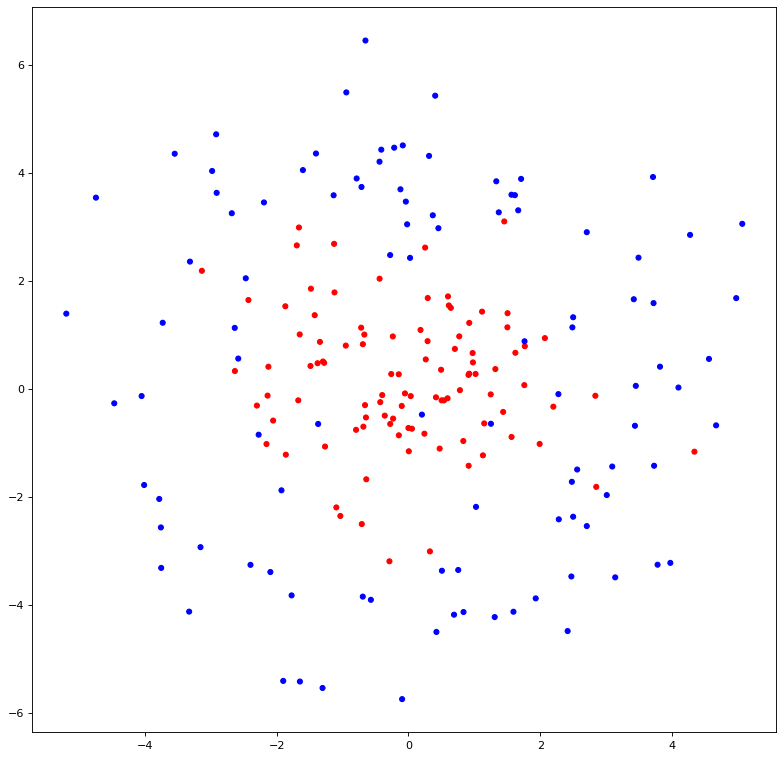

In [398]:
# generate training data
import numpy as np
N = 200
y = np.random.uniform(1,3,N)
y = np.floor(y)
X = np.zeros((N,2))
for j in np.linspace(0,N-1,N):
    temp = np.random.randn(2)
    temp = y[int(j)]**2*temp/np.linalg.norm(temp)
    X[int(j),:] = temp + 1.*np.random.randn(2)


import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
fig=plt.figure(figsize=(12, 12), dpi= 80, facecolor='w', edgecolor='k')
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=20)
#plt.scatter(X[:, 0], X[:, 1],c=1)
plt.show()

#initialize
N1=4
N2=2
w1 = np.random.randn(N1,2)
w2 = np.random.randn(N2,N1)
w3 = np.random.randn(2,1)
Dw3 = np.random.randn(2,1)
a1 = np.zeros((N1,1))
a2 = np.zeros((N2,1))
z1 = np.zeros((N1,1))
z2 = np.zeros((N2,1))
d1 = np.zeros((N1,1))
d2 = np.zeros((N2,1))
b1 = np.zeros((N1,1))
b2 = np.zeros((N2,1))
b3 = np.zeros((1,1))
iter = 0

def sigmoid(X):
   return 1/(1+np.exp(-X))
def sigmoid_d(X):
   return np.exp(-X)/(1+np.exp(-X))**2

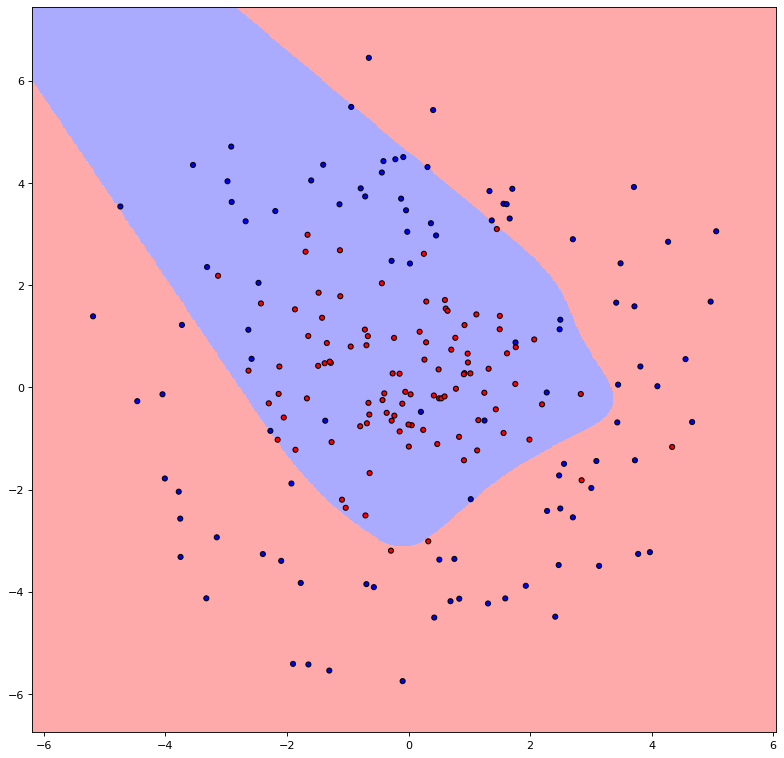

In [417]:
eta = 0.4

for i in np.arange(N):
    # forward pass
    a1 = np.matmul(w1,X[i,:].T).reshape(len(b1), 1)+b1.reshape(len(b1), 1)
    z1 = sigmoid(a1)
    a2 = np.matmul(w2,z1).reshape(len(b2), 1) + b2.reshape(len(b2), 1)
    z2  = sigmoid(a2)
    a3 = np.matmul(w3.T,z2) + b3.reshape(len(b3), 1)
    # backward pass
    d3 = (2*y[i]-3)* np.exp(a3*(2*y[i]-3)) / (1+np.exp(a3*(2*y[i]-3)))
    Dw3 = d3*z2
    Db3 = d3
    d2 = np.multiply(sigmoid_d(a2),np.matmul(w3,d3))
    Dw2 = np.outer(d2,z1.T)
    Db2 = d2
    d1 = np.multiply(sigmoid_d(a1),np.matmul(w2.T,d2))
    Dw1 = np.outer(d1,X[i,:])
    Db1 = d1
    # update
    w1 = w1 - eta*Dw1
    w2 = w2 - eta*Dw2
    w3 = w3 - eta*Dw3.reshape(len(Dw3), 1)
    b1 = b1 - eta*Db1
    b2 = b2 - eta*Db2
    b3 = b3 - eta*Db3.reshape(len(Db3), 1)
iter = iter+1

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
fig=plt.figure(figsize=(12, 12), dpi= 80, facecolor='w', edgecolor='k')
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=20)
#plt.scatter(X[:, 0], X[:, 1],c=1)
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
input = np.c_[xx.ravel(), yy.ravel()]
Z = np.zeros(xx.ravel().size)
for i in np.arange(xx.ravel().size):
    a1 = np.matmul(w1,input[i,:].T).reshape(len(b1), 1)+b1.reshape(len(b1), 1)
    z1 = sigmoid(a1)
    a2 = np.matmul(w2,z1).reshape(len(b2), 1) + b2.reshape(len(b2), 1)
    z2  = sigmoid(a2)
    a3 = np.matmul(w3.T,z2) + b3.reshape(len(b3), 1)
    Z[i] = np.sign(a3)
#    Z[i] = a3

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

#display(Dw1)
#display(Dw2)
#display(Dw3)
plt.show()

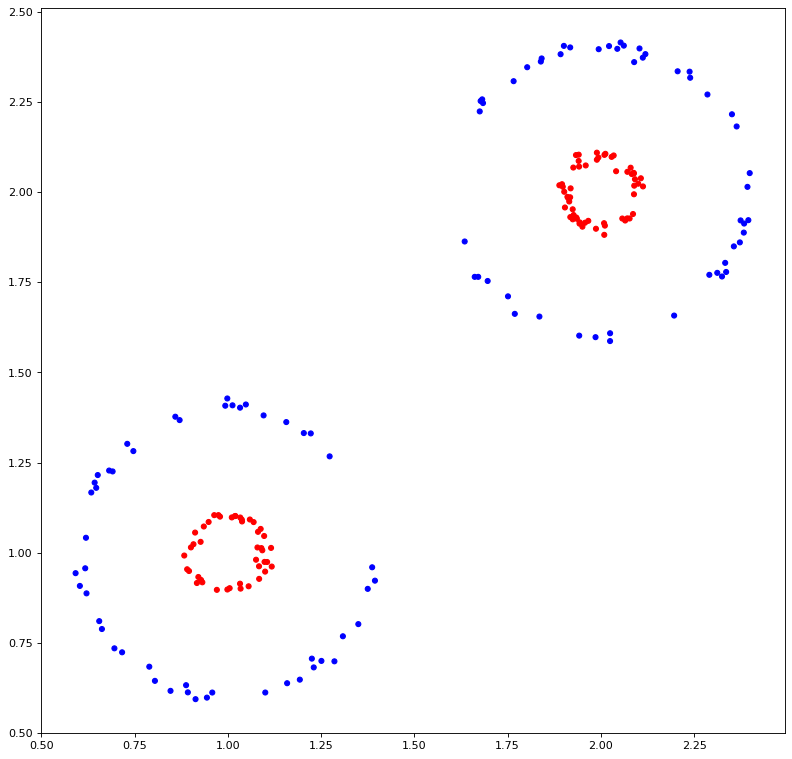

In [418]:
# generate training data
import numpy as np
N = 200
y = np.random.uniform(1,3,N)
y = np.floor(y)
X = np.zeros((N,2))
for j in np.linspace(0,N-1,N):
    temp = np.random.randn(2)
    temp = y[int(j)]**2*temp/np.linalg.norm(temp) + 10*np.floor(np.random.uniform(1,3))
    X[int(j),:] = (temp + 0.1*np.random.randn(2))/10


import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
fig=plt.figure(figsize=(12, 12), dpi= 80, facecolor='w', edgecolor='k')
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=20)
#plt.scatter(X[:, 0], X[:, 1],c=1)
plt.show()

#initialize
N1=8
N2=4
w1 = np.random.randn(N1,2)
w2 = np.random.randn(N2,N1)
w3 = np.random.randn(N2,1)
Dw3 = np.random.randn(N2,1)
a1 = np.zeros((N1,1))
a2 = np.zeros((N2,1))
z1 = np.zeros((N1,1))
z2 = np.zeros((N2,1))
d1 = np.zeros((N1,1))
d2 = np.zeros((N2,1))
b1 = np.zeros((N1,1))
b2 = np.zeros((N2,1))
b3 = np.zeros((1,1))
iter = 0

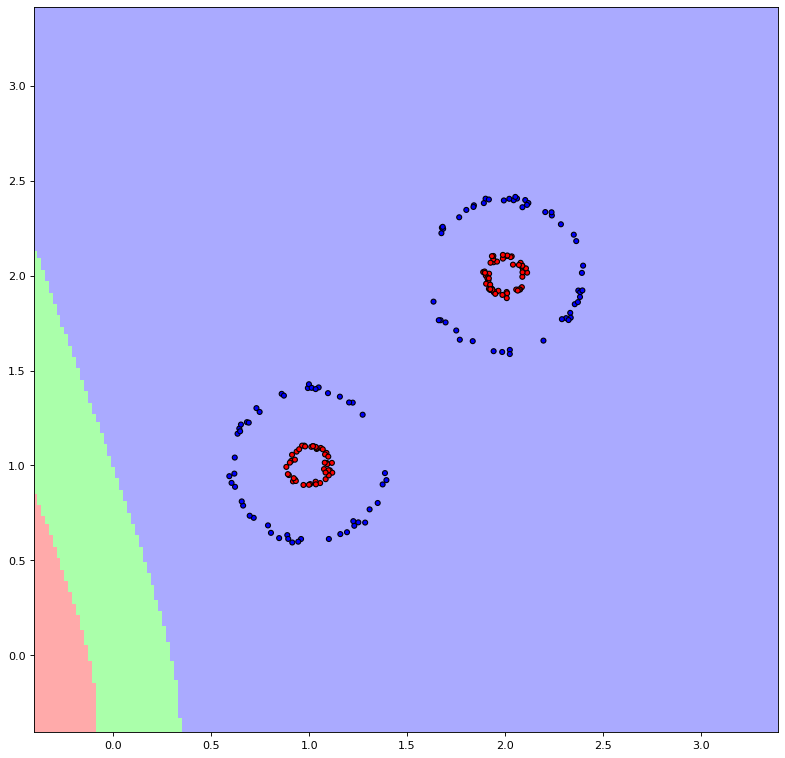

In [422]:
eta = 13.4

for i in np.arange(N):
    # forward pass
    a1 = np.matmul(w1,X[i,:].T).reshape(len(b1), 1)+b1.reshape(len(b1), 1)
    z1 = sigmoid(a1)
    a2 = np.matmul(w2,z1).reshape(len(b2), 1) + b2.reshape(len(b2), 1)
    z2  = sigmoid(a2)
    a3 = np.matmul(w3.T,z2) + b3.reshape(len(b3), 1)
    # backward pass
    d3 = (2*y[i]-3)* np.exp(a3*(2*y[i]-3)) / (1+np.exp(a3*(2*y[i]-3)))
    Dw3 = d3*z2
    Db3 = d3
    d2 = np.multiply(sigmoid_d(a2),np.matmul(w3,d3))
    Dw2 = np.outer(d2,z1.T)
    Db2 = d2
    d1 = np.multiply(sigmoid_d(a1),np.matmul(w2.T,d2))
    Dw1 = np.outer(d1,X[i,:])
    Db1 = d1
    # update
    w1 = w1 - eta*Dw1
    w2 = w2 - eta*Dw2
    w3 = w3 - eta*Dw3.reshape(len(Dw3), 1)
    b1 = b1 - eta*Db1
    b2 = b2 - eta*Db2
    b3 = b3 - eta*Db3.reshape(len(Db3), 1)
iter = iter+1

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
fig=plt.figure(figsize=(12, 12), dpi= 80, facecolor='w', edgecolor='k')
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=20)
#plt.scatter(X[:, 0], X[:, 1],c=1)
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
input = np.c_[xx.ravel(), yy.ravel()]
Z = np.zeros(xx.ravel().size)
for i in np.arange(xx.ravel().size):
    a1 = np.matmul(w1,input[i,:].T).reshape(len(b1), 1)+b1.reshape(len(b1), 1)
    z1 = sigmoid(a1)
    a2 = np.matmul(w2,z1).reshape(len(b2), 1) + b2.reshape(len(b2), 1)
    z2  = sigmoid(a2)
    a3 = np.matmul(w3.T,z2) + b3.reshape(len(b3), 1)
#    Z[i] = np.sign(a3)
    Z[i] = a3

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

In [340]:
Z

array([[-1.20145859, -1.20149842, -1.20153807, ..., -1.20211256,
        -1.20210974, -1.20210692],
       [-1.20142985, -1.20146957, -1.20150913, ..., -1.20213131,
        -1.20212852, -1.20212574],
       [-1.20140102, -1.20144061, -1.20148006, ..., -1.20214966,
        -1.20214692, -1.20214418],
       ...,
       [-1.19965536, -1.19965728, -1.19965915, ..., -1.20013568,
        -1.20014631, -1.20015719],
       [-1.19965539, -1.19965732, -1.19965919, ..., -1.20012357,
        -1.20013392, -1.20014452],
       [-1.19965543, -1.19965735, -1.19965922, ..., -1.20011179,
        -1.20012186, -1.20013218]])

In [343]:
Dw3
Db3

array([[0.98388045]])